In [144]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [145]:
n_in = 30 #历史数量
n_out = 1 #预测数量
n_features = 1
# n_test = 1
n_val = 1
n_epochs = 250

In [146]:
#d导入数据
def load_stw_data() -> pd.DataFrame:
    
    df_stw = pd.read_excel('表5.xlsx')
    df_stw.columns = ['Date', 'Value']
    
    return df_stw

In [147]:
#MinMaxScaler数据归一化，可以帮助网络模型更快的拟合，稍微有一些提高准确率的效果
def minmaxscaler(data: pd.DataFrame) -> pd.DataFrame:
    
    volume = data.Value.values
    volume = volume.reshape(len(volume), 1)
    volume = scaler.fit_transform(volume)
    volume = volume.reshape(len(volume),)    
    data['Value'] = volume
        
    return data

In [148]:
#划分训练数据集和验证数据集,这里需要注意的是我么需要预测的数据是不可以出现在训练中的，切记。
def split_data(x, y, n_test: int):
    x_train = x[:-n_val-n_out+1]
    x_val = x[-n_val:]
    y_train = y[:-n_val-n_out+1]
    y_val = y[-n_val:]
    
    return x_train, y_train, x_val, y_val

In [149]:
#划分X和Y
def build_train(train, n_in, n_out):
    
    train = train.drop(["Date"], axis=1)
    X_train, Y_train = [], []
    for i in range(train.shape[0]-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out]["Value"]))
        
    return np.array(X_train), np.array(Y_train)

In [150]:
#构建最简单的LSTM
def build_lstm(n_in: int, n_features: int):
    
    model = Sequential()
    model.add(LSTM(12, activation='relu', input_shape=(n_in, n_features)))
    model.add(Dropout(0.1))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [151]:
#模型拟合
def model_fit(x_train, y_train, x_val, y_val, n_features):
    
    model = build_lstm(
        n_in   = n_in,
        n_features= 1
    )
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=128,  validation_data=(x_val, y_val))
    m = model.evaluate(x_val, y_val)
    print(m)
    
    return model

In [152]:
data = load_stw_data()
scaler = MinMaxScaler(feature_range=(0, 1))
data = minmaxscaler(data)

In [153]:
data_copy = data.copy()
x, y = build_train(data_copy, n_in, n_out)
x_train, y_train, x_val, y_val = split_data(x, y, n_val)
model = build_lstm(n_in, 1)
model = model_fit(x_train, y_train, x_val, y_val, 1)
predict = model.predict(x_val)  

Train on 992 samples, validate on 1 samples
Epoch 1/250
992/992 [==============================] - 1s 527us/step - loss: 0.0576 - val_loss: 0.1867
Epoch 2/250
992/992 [==============================] - 0s 114us/step - loss: 0.0435 - val_loss: 0.1409
Epoch 3/250
992/992 [==============================] - 0s 96us/step - loss: 0.0298 - val_loss: 0.0974
Epoch 4/250
992/992 [==============================] - 0s 92us/step - loss: 0.0198 - val_loss: 0.0595
Epoch 5/250
992/992 [==============================] - 0s 92us/step - loss: 0.0138 - val_loss: 0.0298
Epoch 6/250
992/992 [==============================] - 0s 100us/step - loss: 0.0097 - val_loss: 0.0129
Epoch 7/250
992/992 [==============================] - 0s 100us/step - loss: 0.0094 - val_loss: 0.0091
Epoch 8/250
992/992 [==============================] - 0s 102us/step - loss: 0.0085 - val_loss: 0.0116
Epoch 9/250
992/992 [==============================] - 0s 91us/step - loss: 0.0069 - val_loss: 0.0130
Epoch 10/250
992/992 [===========

992/992 [==============================] - 0s 95us/step - loss: 0.0024 - val_loss: 9.5269e-04
Epoch 81/250
992/992 [==============================] - 0s 91us/step - loss: 0.0033 - val_loss: 4.8011e-04
Epoch 82/250
992/992 [==============================] - 0s 83us/step - loss: 0.0026 - val_loss: 6.6119e-04
Epoch 83/250
992/992 [==============================] - 0s 86us/step - loss: 0.0025 - val_loss: 0.0011
Epoch 84/250
992/992 [==============================] - 0s 85us/step - loss: 0.0021 - val_loss: 0.0011
Epoch 85/250
992/992 [==============================] - 0s 101us/step - loss: 0.0028 - val_loss: 6.7008e-04
Epoch 86/250
992/992 [==============================] - 0s 90us/step - loss: 0.0023 - val_loss: 6.7377e-04
Epoch 87/250
992/992 [==============================] - 0s 88us/step - loss: 0.0020 - val_loss: 7.0949e-04
Epoch 88/250
992/992 [==============================] - 0s 86us/step - loss: 0.0025 - val_loss: 5.3580e-04
Epoch 89/250
992/992 [==============================] - 0

992/992 [==============================] - 0s 82us/step - loss: 0.0018 - val_loss: 1.2669e-04
Epoch 157/250
992/992 [==============================] - 0s 88us/step - loss: 0.0019 - val_loss: 9.3263e-05
Epoch 158/250
992/992 [==============================] - 0s 90us/step - loss: 0.0020 - val_loss: 1.7364e-04
Epoch 159/250
992/992 [==============================] - 0s 88us/step - loss: 0.0019 - val_loss: 6.9811e-05
Epoch 160/250
992/992 [==============================] - 0s 86us/step - loss: 0.0017 - val_loss: 1.4106e-05
Epoch 161/250
992/992 [==============================] - 0s 80us/step - loss: 0.0016 - val_loss: 4.2455e-06
Epoch 162/250
992/992 [==============================] - 0s 81us/step - loss: 0.0022 - val_loss: 1.8062e-06
Epoch 163/250
992/992 [==============================] - 0s 93us/step - loss: 0.0017 - val_loss: 3.8994e-05
Epoch 164/250
992/992 [==============================] - 0s 107us/step - loss: 0.0017 - val_loss: 6.9976e-05
Epoch 165/250
992/992 [==================

Epoch 232/250
992/992 [==============================] - 0s 89us/step - loss: 0.0015 - val_loss: 1.2164e-05
Epoch 233/250
992/992 [==============================] - 0s 84us/step - loss: 0.0020 - val_loss: 1.8275e-05
Epoch 234/250
992/992 [==============================] - 0s 86us/step - loss: 0.0018 - val_loss: 1.8257e-05
Epoch 235/250
992/992 [==============================] - 0s 83us/step - loss: 0.0016 - val_loss: 2.1028e-05
Epoch 236/250
992/992 [==============================] - 0s 84us/step - loss: 0.0022 - val_loss: 8.7879e-06
Epoch 237/250
992/992 [==============================] - 0s 86us/step - loss: 0.0016 - val_loss: 1.8313e-05
Epoch 238/250
992/992 [==============================] - 0s 86us/step - loss: 0.0015 - val_loss: 1.5371e-05
Epoch 239/250
992/992 [==============================] - 0s 87us/step - loss: 0.0017 - val_loss: 4.6607e-05
Epoch 240/250
992/992 [==============================] - 0s 83us/step - loss: 0.0017 - val_loss: 8.4156e-06
Epoch 241/250
992/992 [=====

In [154]:
print(x_val)

[[[0.40616457]
  [0.42104718]
  [0.42109955]
  [0.4308448 ]
  [0.39888909]
  [0.37460294]
  [0.38043432]
  [0.38134363]
  [0.39166175]
  [0.38812028]
  [0.37274149]
  [0.39283025]
  [0.38739242]
  [0.40090659]
  [0.40433538]
  [0.42844168]
  [0.43721573]
  [0.443538  ]
  [0.46197214]
  [0.44867908]
  [0.4595505 ]
  [0.47275628]
  [0.50862215]
  [0.53291518]
  [0.54063023]
  [0.55136941]
  [0.5909841 ]
  [0.65267013]
  [0.5574711 ]
  [0.62314293]]]


In [155]:

# predict = model.predict(x_val)  
validation = scaler.inverse_transform(predict)[0]
validation

array([11810.329], dtype=float32)

In [156]:
actual = scaler.inverse_transform(y_val)[0]
actual

array([11890.38])

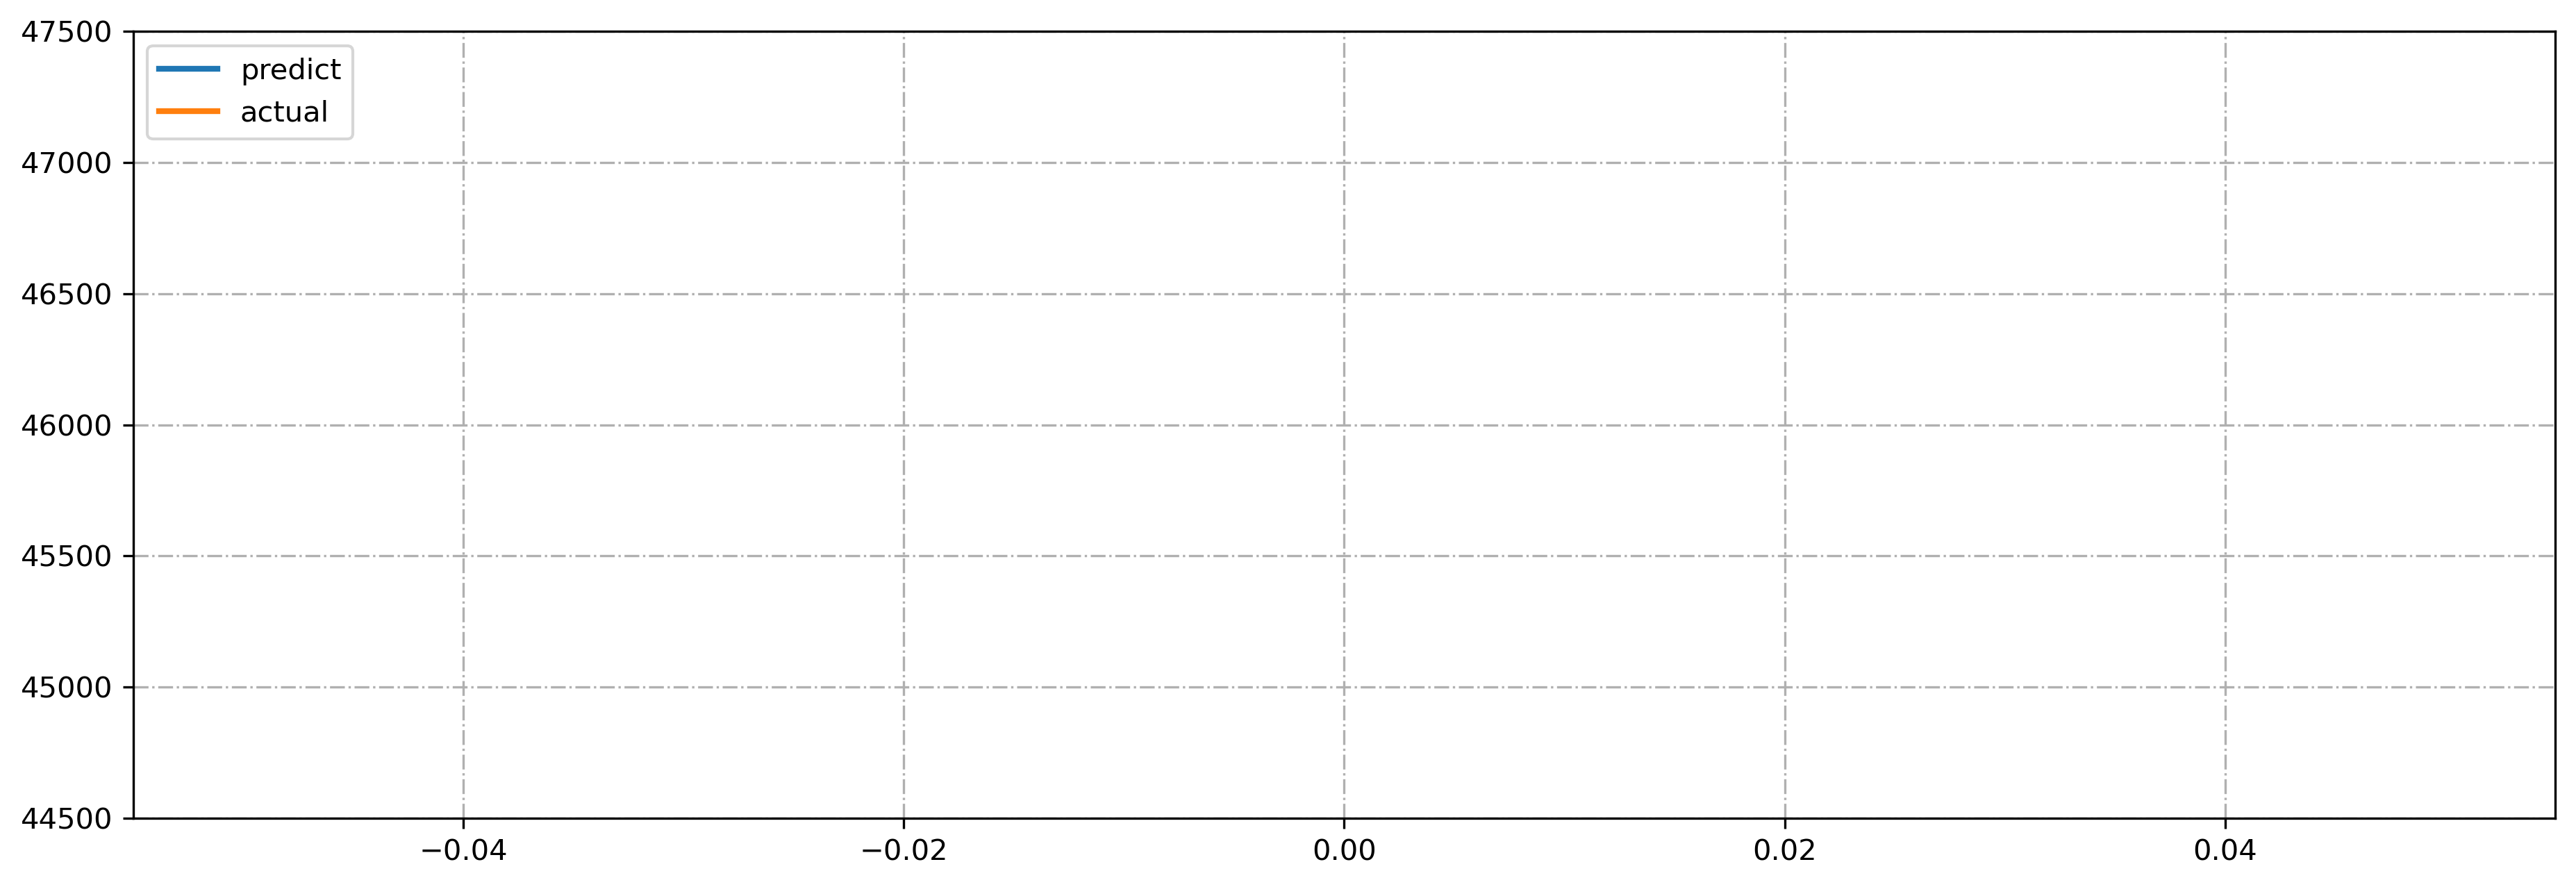

In [157]:
predict = validation
actual = actual
x = [x for x in range(1)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
plt.ylim((44500, 47500))
plt.grid(linestyle='-.')
plt.show()

In [158]:
#ACC
error = 0
summery = 0
for i in range(1):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.9932675912428788